In [2]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
from scipy.stats import kstest
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Task 1

In [5]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:compiling stan file /home/lab4/height_1_ppc.stan to exe file /home/lab4/height_1_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


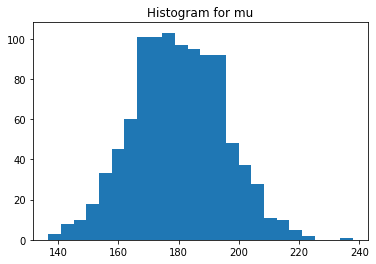

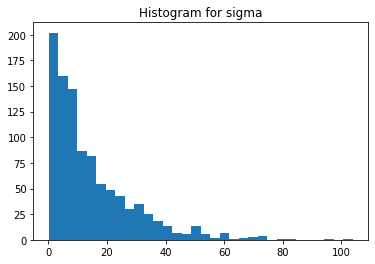

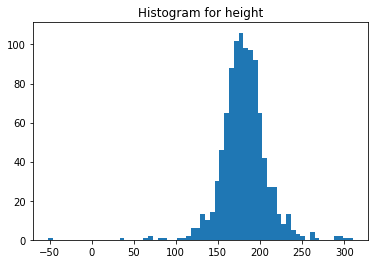

In [16]:
df1 = sim.draws_pd()
plt.hist(df1["mu"],bins="auto")
plt.title("Histogram for mu")
plt.show()
plt.hist(df1["sigma"],bins="auto")
plt.title("Histogram for sigma")
plt.show()
plt.hist(df1["height"],bins="auto")
plt.title("Histogram for height")
plt.show()


Text(0, 0.5, 'sigma')

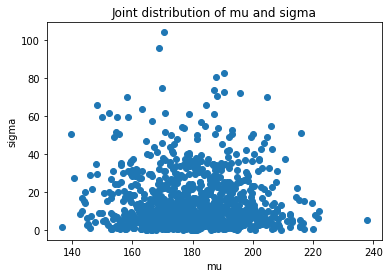

In [20]:
plt.scatter(df1["mu"],df1["sigma"])
plt.title("Joint distribution of mu and sigma")
plt.xlabel("mu")
plt.ylabel("sigma")

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,220.623,8.126140,206.427
1,0.0,0.0,187.980,70.331700,297.105
2,0.0,0.0,174.566,11.778900,182.293
3,0.0,0.0,183.451,19.518000,218.821
4,0.0,0.0,160.795,4.678490,168.163
...,...,...,...,...,...
995,0.0,0.0,180.528,0.038448,180.516
996,0.0,0.0,175.565,5.345250,175.420
997,0.0,0.0,187.817,12.742400,182.643
998,0.0,0.0,162.099,4.810070,159.038


In [31]:
ks_statistic, p_value = kstest(df1["height"], 'norm', args=(180,15))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Generated samples are consistent with the prior distribution.")
else:
    print("Generated samples are not consistent with the prior distribution.")

Kolmogorov-Smirnov statistic: 0.09760075834829618
p-value: 9.612463643814616e-09
Generated samples are not consistent with the prior distribution.


# Task 2

In [6]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
df2 = fit.draws_pd()
df2.describe()


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,-896.801157,0.912090,0.907975,1.880750,3.50650,0.0,897.772431,154.624126,7.758652,154.707313
std,0.959173,0.112370,0.102648,0.518263,1.67844,0.0,1.363925,0.397717,0.291712,7.723649
min,-904.668000,0.095621,0.827358,1.000000,1.00000,0.0,895.852000,152.940000,6.851180,129.508000
25%,-897.155750,0.871014,0.830044,2.000000,3.00000,0.0,896.791000,154.356000,7.550695,149.371500
50%,-896.498000,0.953155,0.862400,2.000000,3.00000,0.0,897.440000,154.617000,7.750180,154.758000
75%,-896.115000,0.996014,0.940331,2.000000,3.00000,0.0,898.445750,154.896000,7.949872,159.902500
max,-895.844000,1.000000,1.079740,3.000000,7.00000,0.0,907.171000,155.997000,9.012900,180.155000


Text(0, 0.5, 'sigma')

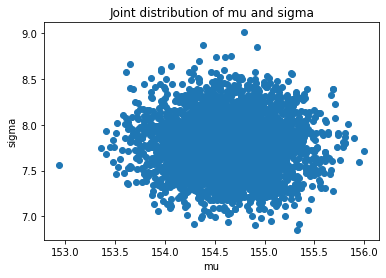

In [12]:
plt.scatter(df2["mu"],df2["sigma"])
plt.title("Joint distribution of mu and sigma")
plt.xlabel("mu")
plt.ylabel("sigma")

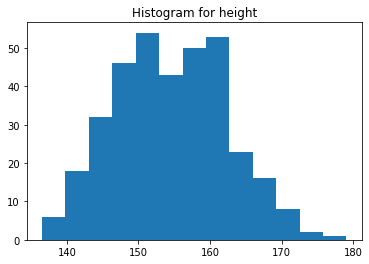

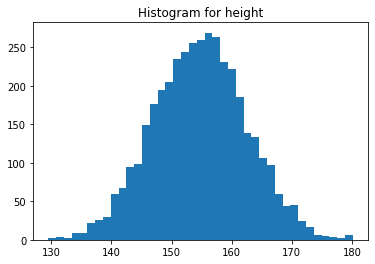

In [16]:

plt.hist(d["height"],bins="auto")
plt.title("Histogram for height")
plt.show()
plt.hist(df2["height"],bins="auto")
plt.title("Histogram for height")
plt.show()

# Task 3

In [18]:
d["c_weight"] = d["weight"].mean() - d["weight"]
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

# Task 4

In [23]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim2=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/lab4/height_2a_ppc.stan to exe file /home/lab4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2a_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2a_ppc.hpp /home/lab4/height_2a_ppc.stan
Warning in '/home/lab4/height_2a_ppc.stan', line 3, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2a_ppc.stan', line 9, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored


INFO:cmdstanpy:CmdStan done processing.


In [46]:
df3 = sim2.draws_pd()
df3.head()

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,220.623,0.777181,23.208300,209.593,174.892,213.357,235.971,261.231,...,253.869,271.088,263.624,234.435,196.823,216.917,223.606,248.153,237.555,246.378
1,0.0,0.0,162.016,-0.006780,0.086958,162.244,162.200,162.194,162.227,162.226,...,162.194,161.955,161.874,161.935,161.861,161.984,161.844,161.922,162.040,161.915
2,0.0,0.0,173.595,-1.138640,20.358900,222.931,189.520,189.346,204.188,199.146,...,200.025,136.696,193.748,169.041,201.322,160.915,180.229,168.371,157.676,162.092
3,0.0,0.0,165.268,-0.254452,6.415610,178.375,165.450,168.119,163.235,167.770,...,166.802,164.046,165.400,171.927,159.734,159.314,167.950,158.985,164.494,159.440
4,0.0,0.0,165.098,1.671020,9.955320,109.030,130.217,129.390,130.579,152.258,...,194.212,192.699,173.463,183.604,181.546,179.516,179.804,193.726,192.998,180.256


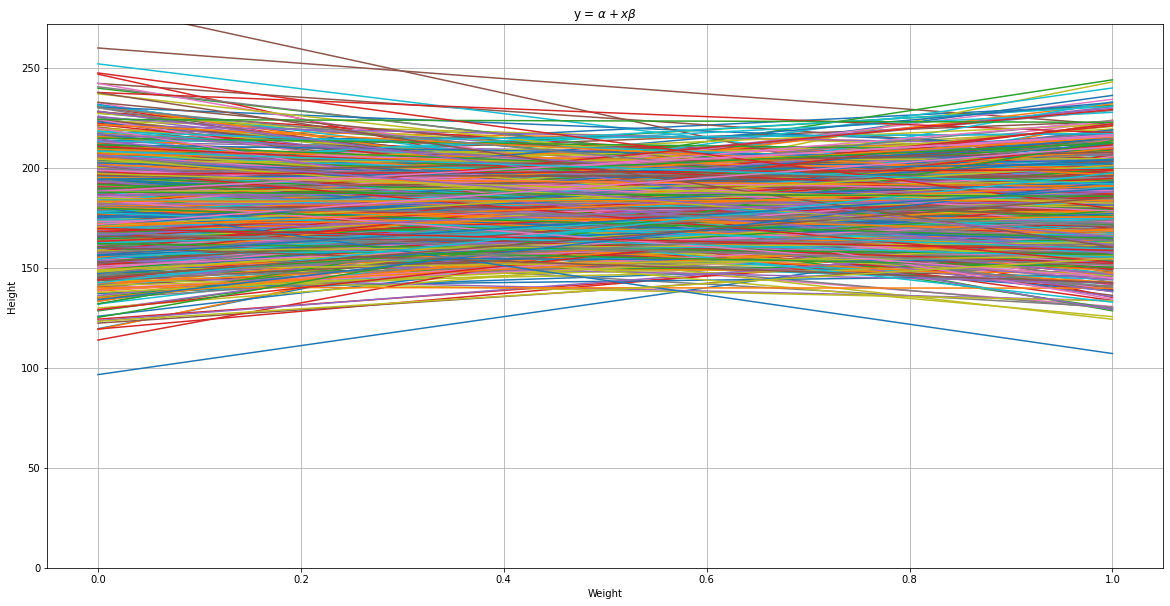

In [49]:
figure,ax = plt.subplots(figsize = (20,10))
ax.plot([df3["alpha"]+df3["beta"]*d.c_weight.min(), df3["alpha"]+df3["beta"]*d.c_weight.max()])
ax.set_title(r"y = $\alpha + x\beta$")
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.grid()
ax.set_ylim([0, 272])
plt.show()


# Task 5


In [56]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')
sim3=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [57]:
df4 = sim3.draws_pd()
df4.head()

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,220.623,2.175330,23.208300,184.4230,150.6330,190.0090,213.5340,239.7050,...,265.133,283.263,276.710,248.431,211.730,232.735,240.335,265.793,256.106,265.840
1,0.0,0.0,162.016,0.993243,0.086958,144.2410,144.8490,145.4940,146.1790,146.8290,...,170.250,170.663,171.234,171.946,172.523,173.298,173.810,174.539,175.308,175.835
2,0.0,0.0,173.595,0.320255,20.358900,196.6680,164.2070,164.9840,180.7760,176.6850,...,211.778,149.399,207.402,183.645,216.877,177.421,197.685,186.777,177.033,182.399
3,0.0,0.0,165.268,0.775342,6.415610,159.8370,147.5820,150.9230,146.7090,151.9150,...,175.098,173.013,175.038,182.236,170.713,170.965,180.272,171.978,178.158,173.774
4,0.0,0.0,165.098,5.317560,9.955320,43.3849,66.9475,68.4955,72.0601,96.1147,...,223.589,224.453,207.591,220.108,220.426,220.771,223.435,239.733,241.380,231.014


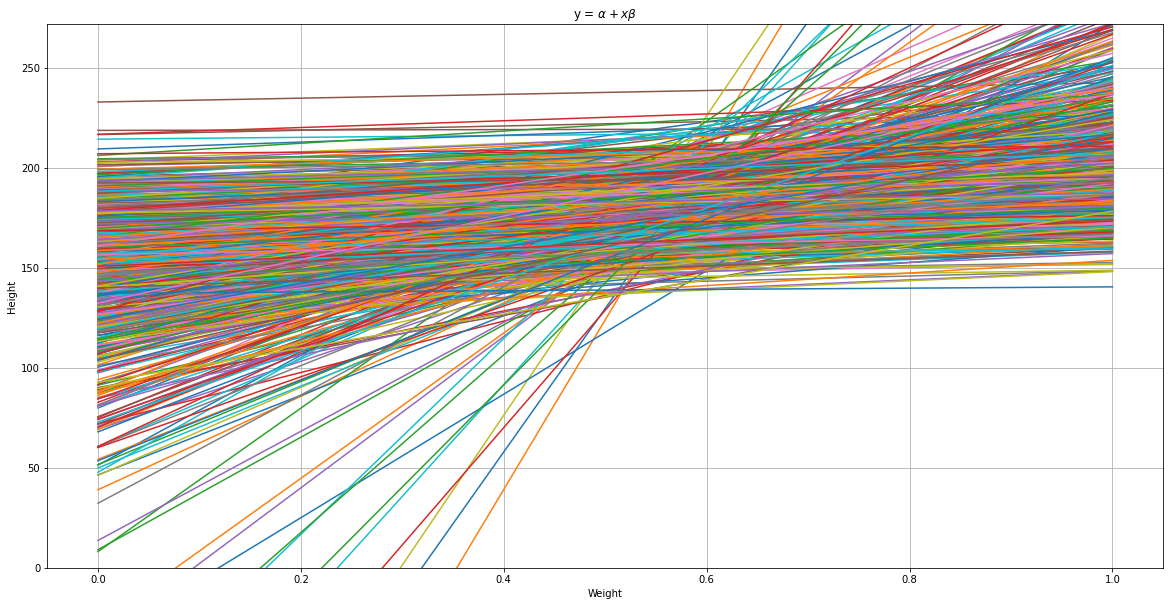

In [58]:
figure,ax = plt.subplots(figsize = (20,10))
ax.plot([df4["alpha"]+df4["beta"]*d.c_weight.min(), df4["alpha"]+df4["beta"]*d.c_weight.max()])
ax.set_title(r"y = $\alpha + x\beta$")
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.grid()
ax.set_ylim([0, 272])
plt.show()


In [59]:
quantiles = df3.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])
q_min = quantiles.iloc[0, 5:]
q_5 = quantiles.iloc[1, 5:]
q_25 = quantiles.iloc[2, 5:]
q_50 = quantiles.iloc[3, 5:]
q_75 = quantiles.iloc[4, 5:]
q_95 = quantiles.iloc[5, 5:]
q_max = quantiles.iloc[6, 5:]

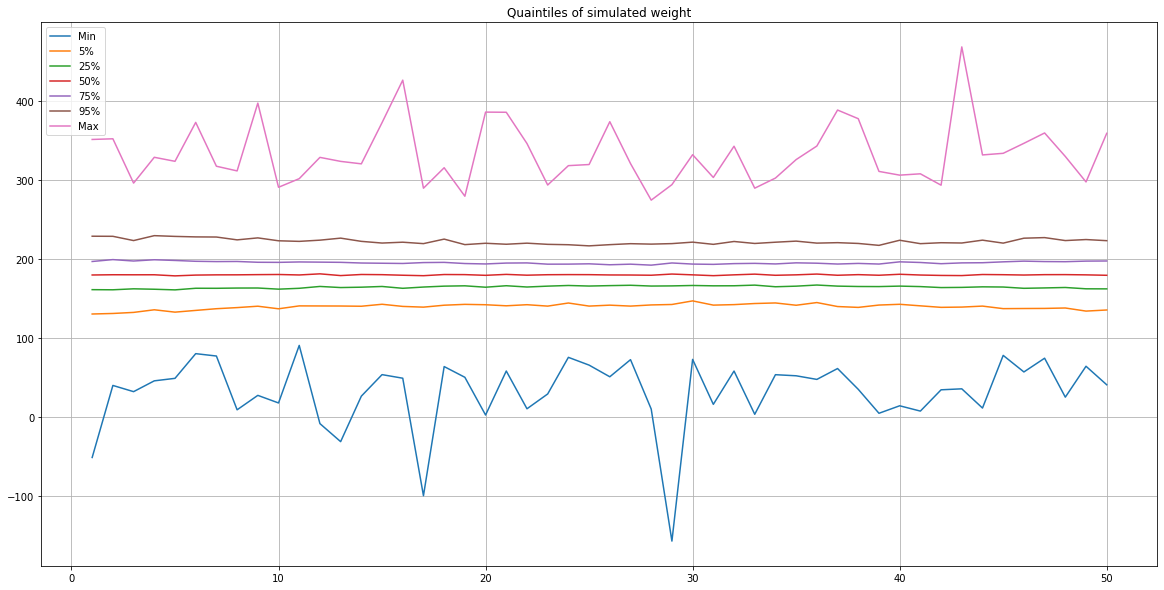

In [63]:
x = np.linspace(1,50)
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, q_min.values.T, label="Min")
ax.plot(x, q_5.values.T, label="5%")
ax.plot(x, q_25.values.T, label="25%")
ax.plot(x, q_50.values.T, label="50%")
ax.plot(x, q_75.values.T, label="75%")
ax.plot(x, q_95.values.T, label="95%")
ax.plot(x, q_max.values.T, label="Max")
plt.grid()
plt.title("Quaintiles of simulated weight")
plt.legend()
plt.show()

# Task 6

In [68]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_2_fit.stan to exe file /home/lab4/height_2_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2_fit.hpp /home/lab4/height_2_fit.stan
Warning in '/home/lab4/height_2_fit.stan', line 3, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2_fit.stan', line 21, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attri

In [70]:
N=50
data_fit = {'N': N, 'weight': d.c_weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)




chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling complet


INFO:cmdstanpy:CmdStan done processing.


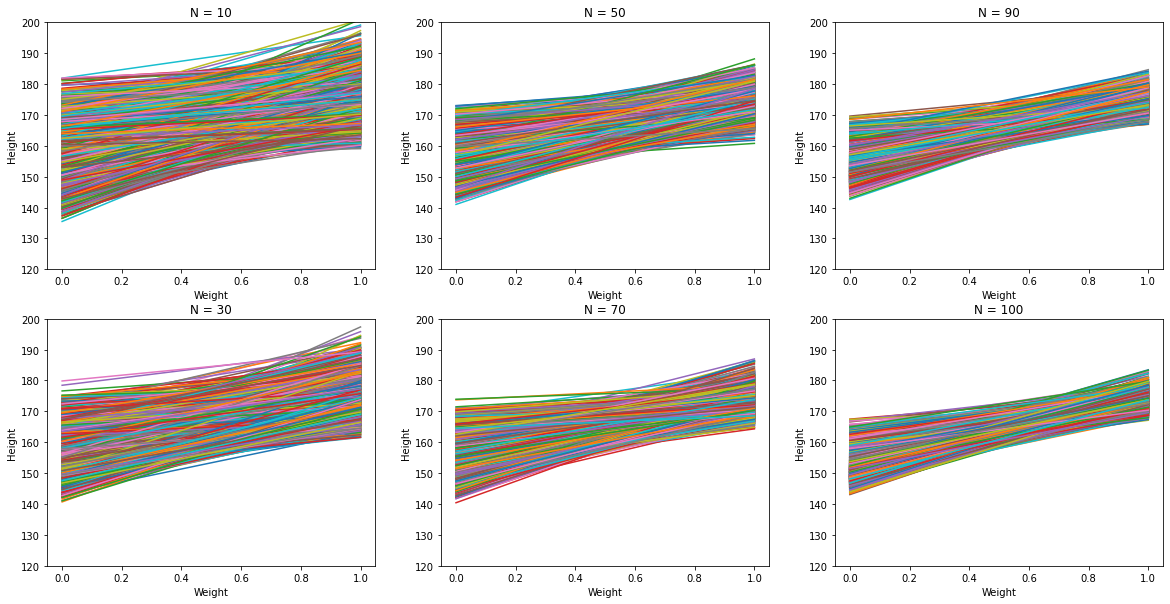

In [80]:
W = [10, 30, 50, 70, 90, 100]
fig, ax = plt.subplots(2,3, figsize = (20, 10))
ax = ax.T.ravel()
for i in range(len(W)):
    N = W[i]
    data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
    fit=model_2_fit.sample(data=data_fit,seed=28052020)
    df = fit.draws_pd()
    alpha = df.loc[:, "alpha"]
    beta = df.loc[:, "beta"]
    ax[i].plot([alpha+beta*d.weight.min(), alpha+beta*d.weight.max()])
    ax[i].set_title("N = {}".format(N))
    ax[i].set_xlabel('Weight')
    ax[i].set_ylabel('Height')
    ax[i].set_ylim([120, 200])

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)






chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status







chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed 

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)















chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Samplin


INFO:cmdstanpy:CmdStan done processing.


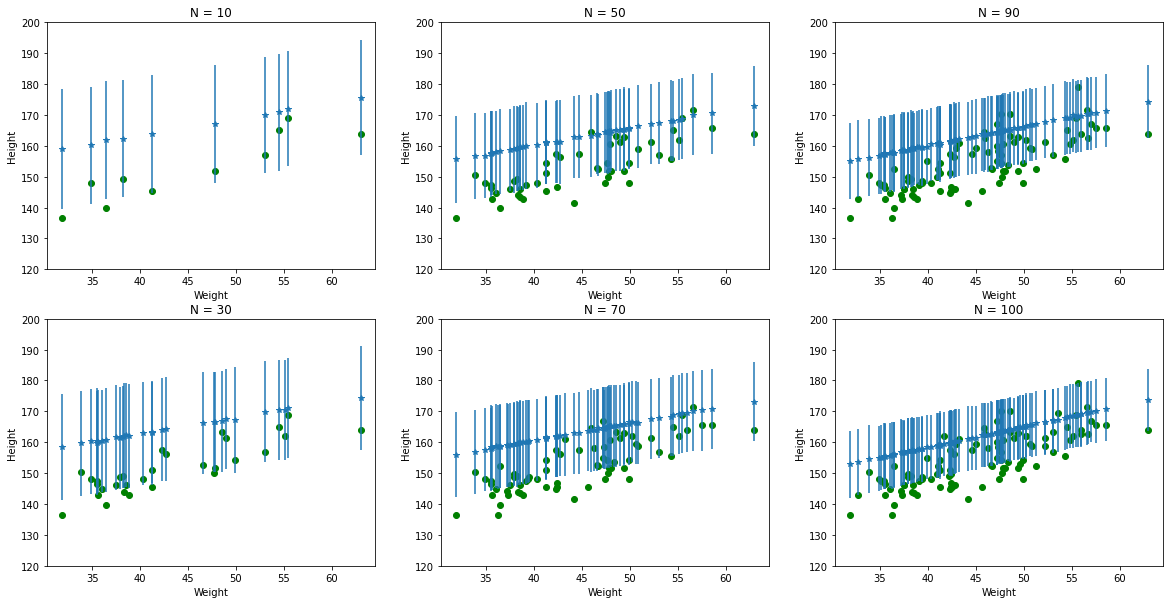

In [86]:
fig, ax = plt.subplots(2,3, figsize = (20, 10))
ax = ax.T.ravel()
for i in range(len(W)):
    N = W[i]
    data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
    fit=model_2_fit.sample(data=data_fit,seed=28052020)
    df = fit.draws_pd()
    stats = df.describe()
    ax[i].scatter(d.weight.iloc[:N].values, d.height.iloc[:N].values, color = "g")
    ax[i].errorbar(d.weight.iloc[:N].values, stats.loc[["mean"]].iloc[:,-N:].to_numpy()[0], yerr=stats.loc[["std"]].iloc[:,-N:].to_numpy()[0], fmt='*')
    ax[i].set_title("N = {}".format(N))
    ax[i].set_xlabel('Weight')
    ax[i].set_ylabel('Height')
    ax[i].set_ylim([120, 200])

# Task 7

In [89]:
model_ppc=CmdStanModel(stan_file='task7.stan')
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

R = 1000
sim5=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [90]:
df5 = sim5.draws_pd()
df5.head()

,lp__,accept_stat__,alpha,beta,beta_2,sigma,height[1],height[2],height[3],height[4],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,220.623,2.175330,-1.272270,1.04927,-232.3070,-199.8720,-169.2340,-139.5560,...,157.548,144.710,129.810,113.450,98.6183,82.1008,65.3108,45.8519,26.1911,3.14116
1,0.0,0.0,179.898,0.996298,1.214860,14.64430,566.5030,545.5930,519.8080,488.3460,...,253.592,278.394,281.688,319.167,313.3800,345.2080,384.8440,384.7340,400.7280,412.47200
2,0.0,0.0,161.672,4.122610,-0.188217,2.08090,27.7191,34.3001,42.1779,42.6172,...,183.368,187.374,183.790,186.151,185.1650,184.1390,184.4980,181.6810,182.7080,181.53200
3,0.0,0.0,199.936,0.516962,-0.217836,18.64680,115.9200,143.2560,143.6410,153.1640,...,181.762,178.982,202.338,174.352,188.2480,171.2560,156.4110,202.9430,155.3430,116.25200
4,0.0,0.0,171.129,0.456621,-0.773806,19.99590,-71.3807,-58.9330,-24.5907,-25.6212,...,115.570,105.810,122.776,109.659,71.7577,62.9270,30.3919,35.5210,24.6753,-10.43830


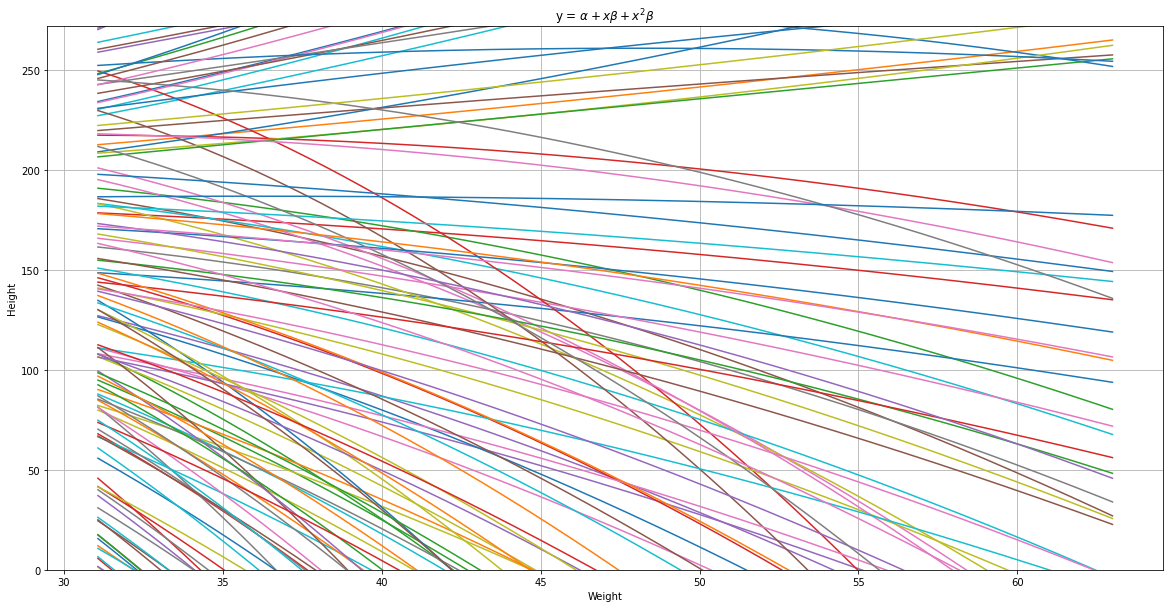

In [91]:
x = np.linspace(d.weight.min(), d.weight.max(), 1000).reshape((-1, 1000))

alpha = df5.loc[:, "alpha"].values.reshape((-1, 1000))
beta = df5.loc[:, "beta"].values.reshape((-1, 1000))
beta_2 = df5.loc[:, "beta_2"].values.reshape((-1, 1000))

y_lines = alpha.T + beta.T@x + beta_2.T@(x*x)
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x[0], y_lines.T)
ax.set_title(r"y = $\alpha + x\beta + x^2\beta$")
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.grid()
ax.set_ylim([0, 272])
plt.show()


In [92]:
model_3_fit=CmdStanModel(stan_file='task7_2.stan')
N=50
data_fit = {'N': N, 'weight': d.c_weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}

fit=model_3_fit.sample(data=data_fit,seed=28052020)
fit.draws_pd()

INFO:cmdstanpy:compiling stan file /home/lab4/task7_2.stan to exe file /home/lab4/task7_2
INFO:cmdstanpy:compiled model executable: /home/lab4/task7_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/task7_2.hpp /home/lab4/task7_2.stan
Warning in '/home/lab4/task7_2.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/task7_2.stan', line 27, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/li


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,beta_2,...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,-134.641,0.998956,0.507498,3.0,7.0,0.0,135.718,149.924,0.109785,0.045018,...,144.659,143.890,143.394,133.854,158.776,153.234,154.963,164.881,154.749,148.917
1,-133.491,0.998182,0.507498,3.0,7.0,0.0,134.813,151.710,0.061909,0.022186,...,152.731,151.974,162.440,140.556,146.635,155.226,168.829,142.093,164.103,147.438
2,-133.402,0.844864,0.507498,2.0,7.0,0.0,135.625,151.755,0.045506,0.006665,...,163.816,144.417,161.871,155.149,159.234,146.918,158.495,136.969,157.654,150.217
3,-133.718,0.928124,0.507498,2.0,7.0,0.0,134.954,150.799,0.069669,0.043349,...,146.717,152.968,157.214,140.341,154.460,162.881,150.488,141.528,158.515,144.316
4,-133.923,0.281464,0.507498,3.0,7.0,0.0,139.340,152.237,0.106211,0.020236,...,152.852,147.137,158.106,152.083,146.799,150.845,142.295,168.729,158.816,158.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-135.628,0.729307,0.528948,2.0,3.0,0.0,136.074,152.504,0.024805,0.042194,...,151.193,168.036,163.260,171.214,157.399,180.378,158.418,153.860,147.735,159.710
3996,-137.422,0.284381,0.528948,2.0,4.0,1.0,139.029,149.879,0.202596,0.019696,...,153.958,146.820,159.144,137.812,144.334,170.373,148.415,129.322,154.170,156.688
3997,-136.689,0.956270,0.528948,3.0,7.0,0.0,138.967,151.287,0.021937,0.002432,...,146.207,170.159,153.408,149.225,150.769,143.390,159.808,134.984,150.765,160.417
3998,-134.585,0.885415,0.528948,2.0,3.0,0.0,136.506,151.883,0.031321,0.008330,...,175.130,154.082,166.558,151.222,170.911,140.813,142.467,145.692,167.839,157.304


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:01 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status






chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status









chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)







chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)







chain 1 |█▊        | 00:02 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:03 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:04 Iteratio

INFO:cmdstanpy:CmdStan done processing.


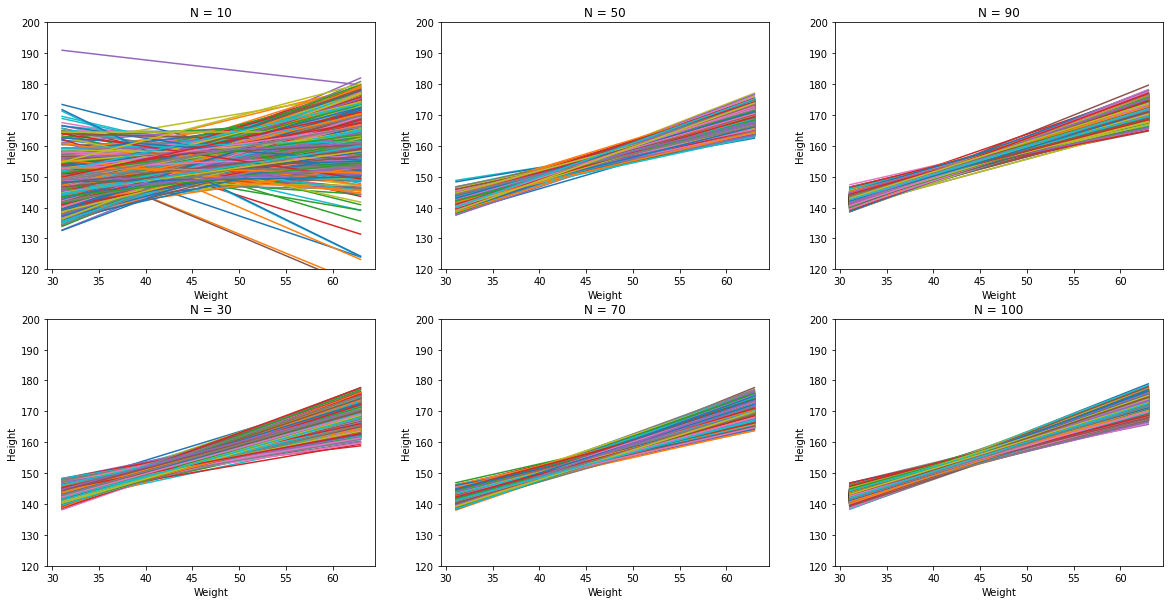

In [94]:
fig, ax = plt.subplots(2,3, figsize = (20, 10))
ax = ax.T.ravel()
for i in range(len(W)):
    N = W[i]
    data_fit = {'N': N, 'weight': d.weight.iloc[:N].values, 'heights': d.height.iloc[:N].values}
    fit=model_3_fit.sample(data=data_fit,seed=28052020)
    df = fit.draws_pd()
    alpha = df.loc[:, "alpha"]
    beta = df.loc[:, "beta"]
    beta_2 = df.loc[:, "beta_2"]
    ax[i].plot([d.weight.min(),d.weight.max()],[alpha+beta*d.weight.min()+beta_2*(d.weight.min()*d.weight.min()), alpha+beta*d.weight.max()+beta_2*(d.weight.max()*d.weight.max())])
    ax[i].set_title("N = {}".format(N))
    ax[i].set_xlabel('Weight')
    ax[i].set_ylabel('Height')
    ax[i].set_ylim([120, 200])